# Decision Tree Classifier with K Fold Crossvalidation**

## Aim
To classify the patients as diabetic or not based on their medical diagnosis

## Dataset
Diabetes dataset

## Source
Kaggle


In [ ]:
# Importing required packages
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics,tree
from sklearn.model_selection import cross_validate,cross_val_score
from sklearn.model_selection import KFold,GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve,accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading dataset
df=pd.read_csv("/content/drive/MyDrive/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Selecting required features
x=df.iloc[:,:-1]
y=df['Outcome']

In [ ]:
# Splitting the dataset into train test split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [ ]:
# Fitting our model Decision Tree Classifier
clf=DecisionTreeClassifier(criterion='entropy',max_depth=4)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy :",metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.7316017316017316


In [ ]:
# Using K fold cross validation
k=KFold(n_splits=10,shuffle=True)
c=cross_val_score(clf,x,y,scoring='accuracy',cv=k)

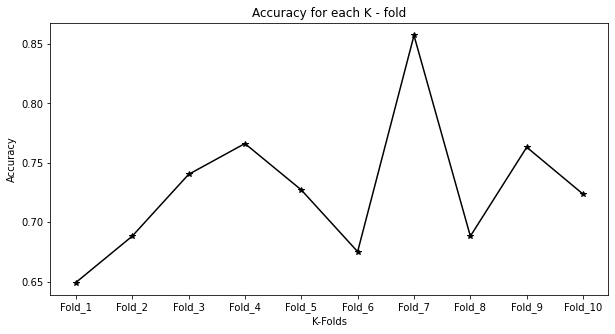

In [ ]:
y1=["Fold_1","Fold_2","Fold_3","Fold_4","Fold_5","Fold_6","Fold_7","Fold_8","Fold_9","Fold_10"]
plt.figure(figsize=(10,5))
plt.title("Accuracy for each K - fold")
plt.xlabel("K-Folds")
plt.ylabel("Accuracy")
plt.plot(y1,c,color='black',marker='*')
plt.show()

In [ ]:
print("Accuracy of Decision Tree with K-Fold is ",round(np.mean(c),2)*100,"%")

Accuracy of Decision Tree with K-Fold is  73.0 %


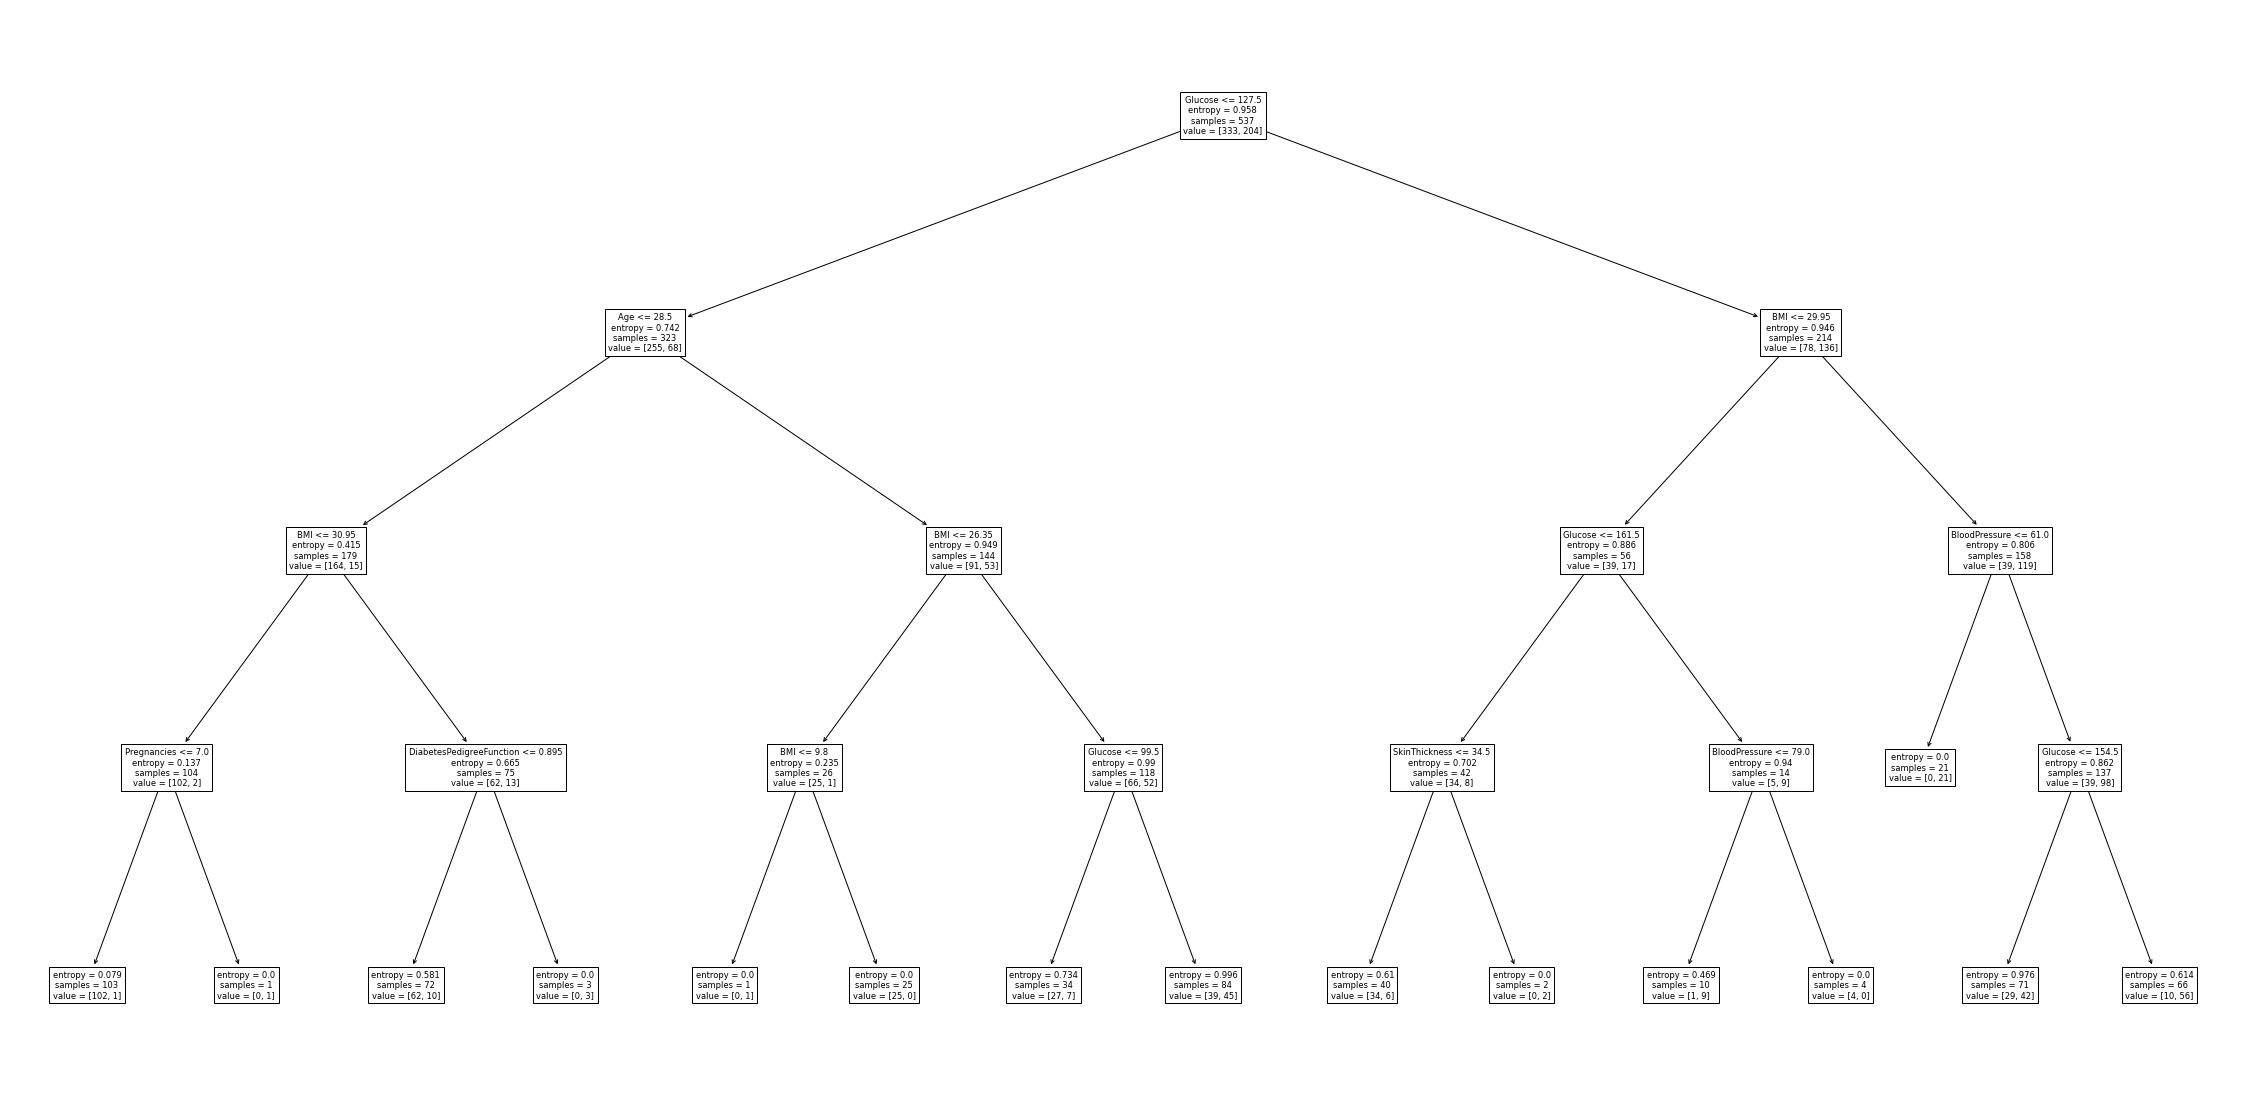

In [ ]:
plt.figure(figsize=(40,20))
tree.plot_tree(clf,feature_names=X_train.columns)
plt.show()

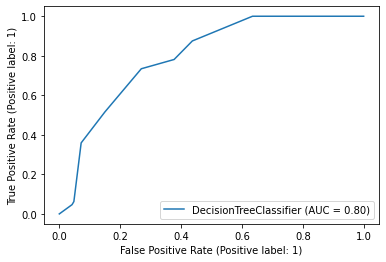

In [ ]:
plot_roc_curve(clf,X_test,y_test)
plt.show()

Best Parameters:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 5}
Accuracy with GridSearch is :  70.0


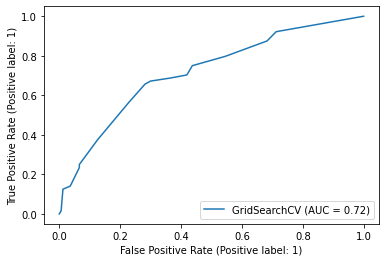

In [ ]:
# Using grid search cv with 5 split k fold cross validation
tree_para={'criterion':['gini','entropy','log_loss'],
           'min_samples_split':[2,3,4,5,6],
           'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
           'max_features':['auto', 'sqrt', 'log2']}
grd=GridSearchCV(DecisionTreeClassifier(),tree_para,cv=5)
grd.fit(X_train,y_train)
print("Best Parameters: ",grd.best_params_)
g_pred=grd.predict(X_test)
print("Accuracy with GridSearch is : ",round(accuracy_score(y_test,g_pred),2)*100)
plot_roc_curve(grd,X_test,y_test)

# Conclusion

### We have used K fold cross validation to best evaluate the model
### We have taken the number of splits as 10 and then used that in our model and found out that we have got an accuracy of 73%
### Our ROC curve has an AUC of 0.80 which means our model will perform classification better

### After GridSearchCV hyperparameter tuning we find that best parameters are
### For criterion : gini,
### max_depth=6 i.e maximum depth of the tree
### max_features=log2 i.e number of features to be considered at each split is
### log2(n_features) min_samples_split=4 i.e minimum number of samples required to
### split an internal node

### And using this parameters our decision tree classifier gave an accuracy of 71% and auc of 0.72
### Hence we can conclude that the model with kfold 10 decision tree classifier is better with more accuracy and auc compared to that of model with grid search cv and kfold 5 (which is default)